In [ ]:
# mockup of a deep learning neural network model to look at the accuracy of predicting if a person has cardiovascular disease

In [38]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [5]:
# upload csv

cardio_train_df = pd.read_csv('Resources/cardio_train.csv')
cardio_train_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# clean data, drop id

clean_df = cardio_train_df.drop(['id'], 1)
clean_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
# clean data, convert age

clean_df['age'] = (clean_df['age']/365).round(1)
clean_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.7,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.9,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.2,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.5,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
# feature data for X:
# age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active
X = clean_df.drop(['cardio'], 1).values

In [9]:
# feature data for y:
# "does a person have a cardiovascular disease y/n"
y = clean_df['cardio']

In [10]:
# training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)

In [11]:
# standard scaler instance
X_scaler = StandardScaler()

In [12]:
# fit standard scaler
X_scaler.fit(X_train)

StandardScaler()

In [13]:
# scale features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# neural net
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8
hidden_nodes_layer4 = 4
hidden_nodes_layer5 = 4

nn_model = tf.keras.models.Sequential()

In [15]:
# first layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation="relu"))

In [16]:
# second layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

In [17]:
# third layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

In [18]:
# forth layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

In [19]:
# fifth layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

In [20]:
# output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [21]:
# check the structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 541
Trainable params: 541
Non-trainable params: 0
__________________________________________________________

In [22]:
# compile model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# train model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1641/1641 [==============================] - 3s 1ms/step - loss: 0.5967 - accuracy: 0.6845
Epoch 2/100
1641/1641 [==============================] - 2s 1ms/step - loss: 0.5523 - accuracy: 0.7284
Epoch 3/100
1641/1641 [==============================] - 2s 1ms/step - loss: 0.5484 - accuracy: 0.7297
Epoch 4/100
1641/1641 [==============================] - 2s 1ms/step - loss: 0.5468 - accuracy: 0.7305
Epoch 5/100
1641/1641 [==============================] - 2s 1ms/step - loss: 0.5455 - accuracy: 0.7315
Epoch 6/100
1641/1641 [==============================] - 2s 1ms/step - loss: 0.5443 - accuracy: 0.7319
Epoch 7/100
1641/1641 [==============================] - 2s 1ms/step - loss: 0.5436 - accuracy: 0.7310
Epoch 8/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.5429 - accuracy: 0.7324
Epoch 9/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.5424 - accuracy: 0.7325
Epoch 10/100
1641/1641 [==============================] - 3s 2ms/step - l

In [24]:
# plot dataframe w/ history dictionary
df_plot = pd.DataFrame(nn_model.history.history, index=range(1, len(nn_model.history.history['loss']) + 1))

<AxesSubplot:>

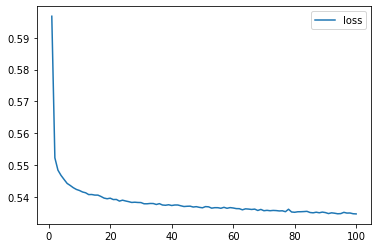

In [25]:
# plot loss
df_plot.plot(y="loss")

<AxesSubplot:>

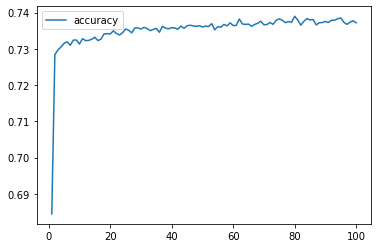

In [26]:
# plot accuracy

df_plot.plot(y= 'accuracy')